# LAB 2 - Feature Selection and Extraction Methods

In [58]:
# Initial stuff, libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [3]:
# Import of the dataset
df = pd.read_csv("framingham-1.csv")

In [54]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### 2.2 - Scatter plot for total cholesterol and systolic blood pressure

From the scatterplot we can see that most data resides in the cell with total cholesterol $200 \le x \le 300$ md/dL and $100 \le x \le 150$ mm HG   

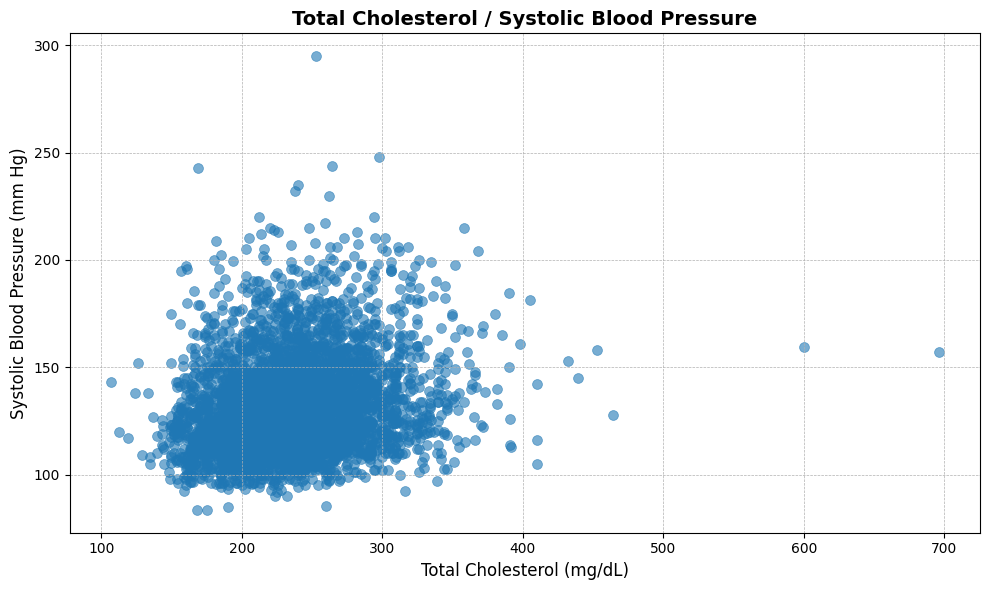

In [9]:
## 2.2 - Scatter plot for total cholesterol and systolic blood pressure


plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.scatterplot(data=df, x='totChol', y='sysBP', alpha=0.6, edgecolor=None, s=50)

# Enhancing the plot
plt.title('Total Cholesterol / Systolic Blood Pressure', fontsize=14, fontweight='bold')
plt.xlabel('Total Cholesterol (mg/dL)', fontsize=12)
plt.ylabel('Systolic Blood Pressure (mm Hg)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

### 2.3 - Correlation between variables (tot chol/systolic blood pressure)

The result of $0.208908$ tell us that the two variables are not strongly correlated, we only have a slightly positive correlation 

In [11]:
## 2.3 - Correlation

corr = df[['totChol', 'sysBP']].corr()

print("The correlation of totChol and sysBP is:")
corr

The correlation of totChol and sysBP is:


,totChol,sysBP
totChol,1.000000,0.208908
sysBP,0.208908,1.000000


### 2.4 - Scatterplot + correlation for diastolic blood pressure and systolic blood pressure

From the scatterplot and the correlation coefficient we can see that the two variables are highly positively correlated

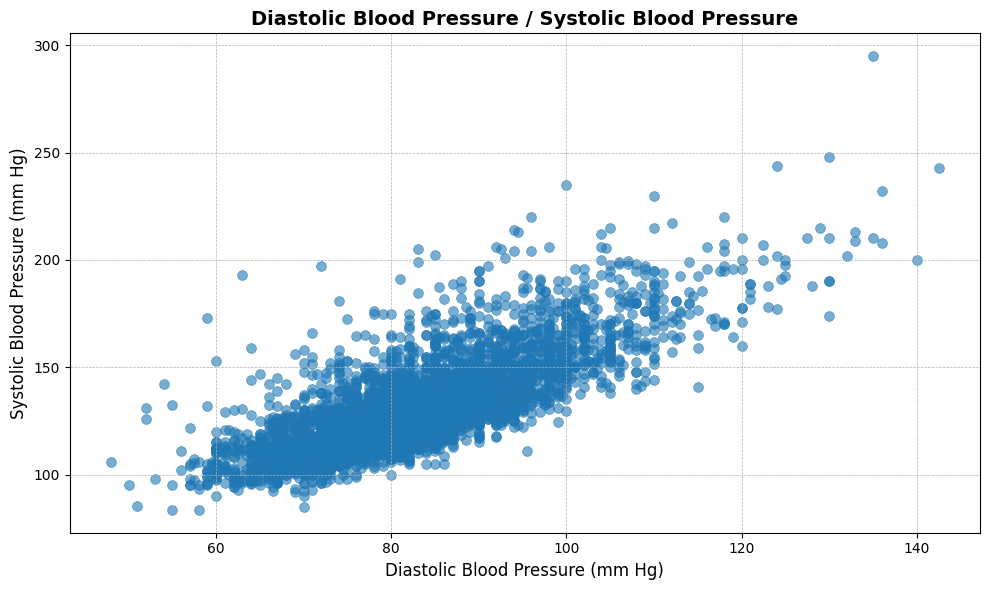

In [12]:
## 2.4 - Scatterplot for diaBP and sysBP

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.scatterplot(data=df, x='diaBP', y='sysBP', alpha=0.6, edgecolor=None, s=50)

# Enhancing the plot
plt.title('Diastolic Blood Pressure / Systolic Blood Pressure', fontsize=14, fontweight='bold')
plt.xlabel('Diastolic Blood Pressure (mm Hg)', fontsize=12)
plt.ylabel('Systolic Blood Pressure (mm Hg)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
## Correlation coefficient
corr2 = df[['diaBP', 'sysBP']].corr()
corr2

,diaBP,sysBP
diaBP,1.000000,0.784002
sysBP,0.784002,1.000000


### 2.5 - How many pair of variables have at most a weak linear relationship?

To show this I will show the correlation matrix and a heat map

In [14]:
# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


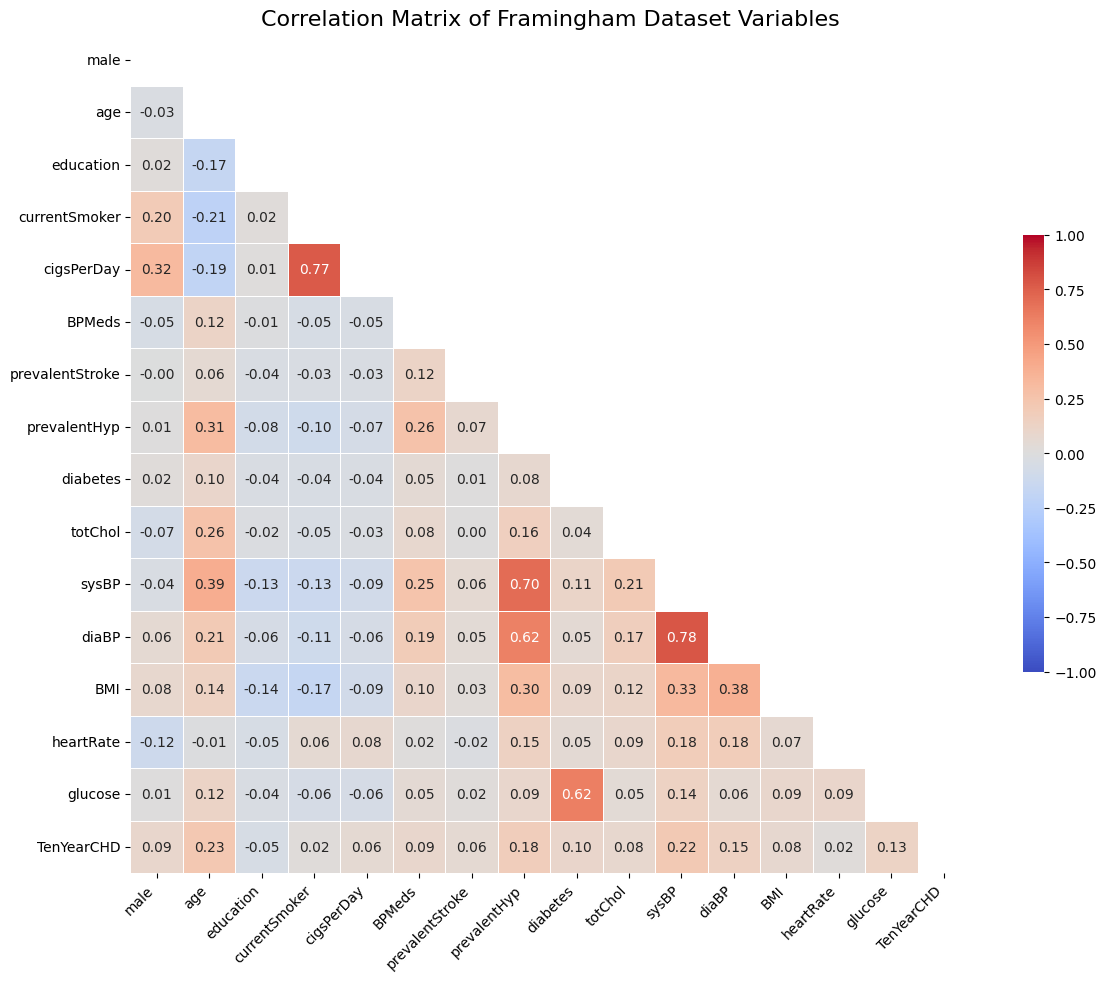

In [20]:
# Part 2 - Visualize correlation for every variable

# Get only the lower left triangle for easier read
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Framingham Dataset Variables', fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
# Number of pairs that are losely correlated

weak_corr = (abs(corr_matrix) < 0.399).sum().sum() // 2
weak_corr

115

## 2.6 mean of avg number of cigarettes smoked p day different for males or females?

First step is checking that all of the assumption are 

To address if the average of cigarettes smoked per day are different for males and females we can use the t-test, our hypotesis are:

- **Null Hypothesis (H0):** mean number of cigarettes smoked is the same for males and females $\mu_{males} = \mu_{females}$
- **Alternative Hypothesis (H1):** mean number of cigarettes smoked is different for males and females $\mu_{males} \ne \mu_{females}$

$H_0$ is rejected

In [30]:
# Separate into groups
males_cigs = df[df['male'] == 1]['cigsPerDay'].dropna()  # Drop NA values to ensure the t-test can be performed
females_cigs = df[df['male'] == 0]['cigsPerDay'].dropna()

In [32]:
# 2.6 - Check assumptions for the test
print("Normality Test:")
print("Males:", stats.shapiro(males_cigs))
print("Females:", stats.shapiro(females_cigs))

# Check Homogeneity of Variances
print("\nHomogeneity of Variances Test:")
print(stats.levene(males_cigs, females_cigs))

Normality Test:
Males: ShapiroResult(statistic=0.8474841458502029, pvalue=1.4176504234213724e-38)
Females: ShapiroResult(statistic=0.685724550477863, pvalue=4.289260251202687e-55)

Homogeneity of Variances Test:
LeveneResult(statistic=591.0855240513011, pvalue=2.7770163822768656e-122)


In [29]:
# 2.6 - Apply f_oneway ANOVA
# Perform the independent samples t-test
t_statistic, p_value = stats.f_oneway(males_cigs, females_cigs)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 473.0580204878489
P-value: 1.7353421339270501e-99


## 2.7 - prevalent stroke and sex not independent?

Is *Prevalent Stroke* and *Sex* not independent?

- $H_0$: Prevalent Stroke and Sex feature independent, no association between them.
- $H_1$: Prevalent Stroke and Sex features are not independent, there is association between them.

**Note:** we never accept $H_0$!



In [60]:
# 2.7
# Create a contingency table
contingency_table = pd.crosstab(df['male'], df['prevalentStroke'])

print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Test:")
print("Chi2 statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Contingency Table:
prevalentStroke     0   1
male                     
0                2404  15
1                1809  10

Chi-square Test:
Chi2 statistic: 0.00871085034477626
P-value: 0.9256398612590797
Degrees of freedom: 1
Expected frequencies: [[2404.73029731   14.26970269]
 [1808.26970269   10.73029731]]
